### 1. DNN을 통한 분류

#### ※ 앞으로 궁금할 상식: 분류 학습에서 왜 Cross Entropy를 사용할 때, output layer에 activation function을 안쓰는걸까?
* (Binary) Cross Entropy에 이미 activation(예: sigmoid, softmax)이 내재되어 있어, 1차로 output의 features(Not categorical)를 activation 해준 후에, 2차로 CE loss 계산

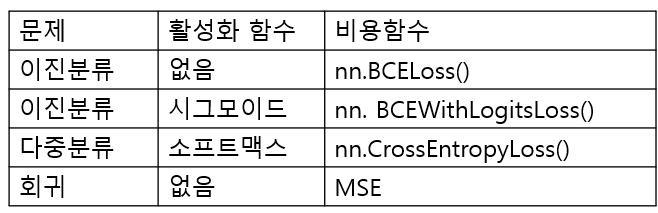

### 2. wine.csv 데이터셋 기반 DNN 이진분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred) # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item() # 맞춘값들을 더한 다음에
        total += y_batch.size(0)    # 해당 미니배치 데이터 셋 개수를 구해 놓고

    accuracy = correct / total   # 맞춘것들 누적 / 미니배치 데이터 셋 갯수 누적
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.0722
Epoch 2/10, Loss: 0.1342
Epoch 3/10, Loss: 0.0167
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0045
Epoch 6/10, Loss: 0.0111
Epoch 7/10, Loss: 0.0039
Epoch 8/10, Loss: 0.0046
Epoch 9/10, Loss: 0.0054
Epoch 10/10, Loss: 0.0381
Accuracy: 0.9977


### 실습) wine.csv 데이터셋 기반 DNN 이진분류를 누군가 코드를 망쳐놨다. 고쳐보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.bn1 = nn.BatchNorm1d(8)
        # self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(8, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.dropout2 = nn.Dropout(0.5)

        self.layer3 = nn.Linear(16, 16)
        # self.bn3 = nn.BatchNorm1d(16)
        # self.dropout3 = nn.Dropout(0.5)

        self.layer4 = nn.Linear(16, 8)
        # self.bn4 = nn.BatchNorm1d(8)
        # self.dropout4 = nn.Dropout(0.5)

        self.layer5 = nn.Linear(8,  1 )  # 수정
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        # x = self.dropout1(x)
        x = self.relu(self.layer2(x))
        x = self.dropout2(x)
        x = self.relu(self.layer3(x))
        # x = self.dropout3(x)
        x = self.relu(self.layer4(x))
        # x = self.dropout4(x)
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()           # 수정
optimizer = optim.Adam(model.parameters(), lr=0.001,   ) # 가중치 decay만 추가함 weight_decay=0.1 , decay하니 성능 더 안좋아 짐


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)   # 시그모이드를 통과해서 확률값 구함  # 수정
        y_pred = (y_pred > 0.5).float()                              # 수정
        correct += (y_pred == y_batch).sum().item()                             # 수정
        total += y_batch.size(0)

    accuracy = correct /total                       # 수정
    print(f'Accuracy: {accuracy:.4f}')

# 배치 정규화, 드롭아웃하니 정확도 더 낮아짐

Epoch 1/10, Loss: 0.0847
Epoch 2/10, Loss: 0.0409
Epoch 3/10, Loss: 0.0246
Epoch 4/10, Loss: 0.0442
Epoch 5/10, Loss: 0.0034
Epoch 6/10, Loss: 0.0028
Epoch 7/10, Loss: 0.0179
Epoch 8/10, Loss: 0.0103
Epoch 9/10, Loss: 0.0042
Epoch 10/10, Loss: 0.0015
Accuracy: 0.9962


### 3. wine.csv 데이터셋 기반 DNN 이진분류

1). accracy

2). f1_score

3). confusion matrix

4). precision

5). recall

을 출력해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


Epoch 1/10, Loss: 0.0397
Epoch 2/10, Loss: 0.0018
Epoch 3/10, Loss: 0.0048
Epoch 4/10, Loss: 0.0016
Epoch 5/10, Loss: 0.3333
Epoch 6/10, Loss: 0.0050
Epoch 7/10, Loss: 0.0020
Epoch 8/10, Loss: 0.0111
Epoch 9/10, Loss: 0.0023
Epoch 10/10, Loss: 0.0038
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[980   0]
 [  3 317]]
Precision: 1.0000
Recall: 0.9906


### 4. wine.csv 데이터셋 기반 DNN 이진분류 - 클래스 불균형 해결

SMOTE를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')
df['class'].value_counts()

,count
class,
0,4898
1,1599


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   # 화이트 와인: 0, 레드 와인: 1

# 데이터셋 분리 (훈련 및 테스트 셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print(f"After SMOTE: \n{pd.Series(y_train_resampled).value_counts()}")

After SMOTE: 
0    3918
1    3918
Name: count, dtype: int64


In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 데이터를 텐서로 변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)  # 2차원으로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

Epoch 1/10, Loss: 0.0204
Epoch 2/10, Loss: 0.0179
Epoch 3/10, Loss: 0.0054
Epoch 4/10, Loss: 0.1314
Epoch 5/10, Loss: 0.0036
Epoch 6/10, Loss: 0.0020
Epoch 7/10, Loss: 0.1201
Epoch 8/10, Loss: 0.0102
Epoch 9/10, Loss: 0.0076
Epoch 10/10, Loss: 0.0046
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[979   1]
 [  2 318]]
Precision: 0.9969
Recall: 0.9938


### 같이해보는 실습) 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True) # nan 값이면 삭제하고 실제로 반영, -> 걍 결측치 행 삭제하고 저장까지

# 범주형 컬럼 라벨 인코더로 숫자로 바꿈
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


# 정답값 빼고 정의
X = df.drop('Survived', axis=1).values

# 정답값만 가져오기
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 0.6546
Epoch 2/50, Loss: 0.5515
Epoch 3/50, Loss: 0.5085
Epoch 4/50, Loss: 0.4817
Epoch 5/50, Loss: 0.5151
Epoch 6/50, Loss: 0.4717
Epoch 7/50, Loss: 0.3603
Epoch 8/50, Loss: 0.5878
Epoch 9/50, Loss: 0.3728
Epoch 10/50, Loss: 0.3397
Epoch 11/50, Loss: 0.3553
Epoch 12/50, Loss: 0.3825
Epoch 13/50, Loss: 0.3983
Epoch 14/50, Loss: 0.2433
Epoch 15/50, Loss: 0.5964
Epoch 16/50, Loss: 0.4277
Epoch 17/50, Loss: 0.5278
Epoch 18/50, Loss: 0.5443
Epoch 19/50, Loss: 0.2996
Epoch 20/50, Loss: 0.4979
Epoch 21/50, Loss: 0.7101
Epoch 22/50, Loss: 0.5850
Epoch 23/50, Loss: 0.5023
Epoch 24/50, Loss: 0.5011
Epoch 25/50, Loss: 0.2604
Epoch 26/50, Loss: 0.2887
Epoch 27/50, Loss: 0.5181
Epoch 28/50, Loss: 0.4224
Epoch 29/50, Loss: 0.2489
Epoch 30/50, Loss: 0.3540
Epoch 31/50, Loss: 0.6943
Epoch 32/50, Loss: 0.2995
Epoch 33/50, Loss: 0.3508
Epoch 34/50, Loss: 0.5801
Epoch 35/50, Loss: 0.3560
Epoch 36/50, Loss: 0.5264
Epoch 37/50, Loss: 0.6085
Epoch 38/50, Loss: 0.3842
Epoch 39/50, Loss: 0.

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,424
1,288


### 5. 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자 - 클래스 불균형 해결

SMOTENC를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 데이터 로드 및 전처리
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 각 클래스가 몇개인지 보자
print(df['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [ ]:
# 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 범주형 변수 인덱스 (Pclass, Sex, Embarked)
categorical_features = [0, 1, 4]

# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
# 범주형과 수치형 변수를 고려하여 클래스 균형에 맞게 데이터를 upsampling 한 결과
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 텐서변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total


Epoch 1/50, Loss: 0.6028
Epoch 2/50, Loss: 0.5064
Epoch 3/50, Loss: 0.4470
Epoch 4/50, Loss: 0.5940
Epoch 5/50, Loss: 0.3383
Epoch 6/50, Loss: 0.4649
Epoch 7/50, Loss: 0.3107
Epoch 8/50, Loss: 0.3688
Epoch 9/50, Loss: 0.2016
Epoch 10/50, Loss: 0.3268
Epoch 11/50, Loss: 0.5669
Epoch 12/50, Loss: 0.1777
Epoch 13/50, Loss: 0.6871
Epoch 14/50, Loss: 0.6712
Epoch 15/50, Loss: 0.1812
Epoch 16/50, Loss: 0.3746
Epoch 17/50, Loss: 0.4035
Epoch 18/50, Loss: 0.3103
Epoch 19/50, Loss: 0.2410
Epoch 20/50, Loss: 0.5896
Epoch 21/50, Loss: 0.4144
Epoch 22/50, Loss: 0.4447
Epoch 23/50, Loss: 0.4810
Epoch 24/50, Loss: 0.3113
Epoch 25/50, Loss: 0.6988
Epoch 26/50, Loss: 0.2333
Epoch 27/50, Loss: 0.0628
Epoch 28/50, Loss: 0.2886
Epoch 29/50, Loss: 0.1888
Epoch 30/50, Loss: 0.2892
Epoch 31/50, Loss: 0.0623
Epoch 32/50, Loss: 0.2167
Epoch 33/50, Loss: 0.5471
Epoch 34/50, Loss: 0.2365
Epoch 35/50, Loss: 0.6397
Epoch 36/50, Loss: 0.2744
Epoch 37/50, Loss: 0.4539
Epoch 38/50, Loss: 0.4487
Epoch 39/50, Loss: 0.

### 3. iris.csv 데이터셋 기반 MLP 다중분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv')
df['variety'] = LabelEncoder().fit_transform(df['variety'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

'''
# 방법 1: nn.Sequential()과 add_module 사용

model = nn.Sequential()
model.add_module('fc1', nn.Linear(4, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 3))

# 방법 2: nn.Sequential() 안에 직접 레이어 정의
model = nn.Sequential(
     nn.Linear(4, 100),  # input_layer = 784, hidden_layer1 = 100
     nn.ReLU(),
     nn.Linear(100, 100),  # hidden_layer2 = 100, hidden_layer3 = 100
     nn.ReLU(),
     nn.Linear(100, 3)  # hidden_layer3 = 100, output_layer = 10
     )
'''
# 방법 3: nn.Module을 상속하는 클래스 정의
class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()
                                        # X_train이 데이터 X 피처갯구의 shape을 가지는데 거기서 인덱스 1(피처갯수)
        self.linear1 = nn.Linear(X_train.shape[1], 100)  # input_layer = X_train.shape[1], hidden_layer1 = 100
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(100, 100)  # hidden_layer2 = 100, hidden_layer3 = 100
        self.activate2 = nn.ReLU()
                                        # 범주형 정답값에서 유니크 셋 즉,버시컬러,세토사,버지니카, 그거의 길이
        self.linear3 = nn.Linear(100, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        return out5

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 5
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break

model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 0.9494, Val Loss: 0.9494
Epoch 2/50, Loss: 0.8295, Val Loss: 0.8295
Epoch 3/50, Loss: 0.7226, Val Loss: 0.7226
Epoch 4/50, Loss: 0.6280, Val Loss: 0.6280
Epoch 5/50, Loss: 0.5480, Val Loss: 0.5480
Epoch 6/50, Loss: 0.4837, Val Loss: 0.4837
Epoch 7/50, Loss: 0.4331, Val Loss: 0.4331
Epoch 8/50, Loss: 0.3932, Val Loss: 0.3932
Epoch 9/50, Loss: 0.3613, Val Loss: 0.3613
Epoch 10/50, Loss: 0.3321, Val Loss: 0.3321
Epoch 11/50, Loss: 0.3084, Val Loss: 0.3084
Epoch 12/50, Loss: 0.2881, Val Loss: 0.2881
Epoch 13/50, Loss: 0.2699, Val Loss: 0.2699
Epoch 14/50, Loss: 0.2530, Val Loss: 0.2530
Epoch 15/50, Loss: 0.2355, Val Loss: 0.2355
Epoch 16/50, Loss: 0.2212, Val Loss: 0.2212
Epoch 17/50, Loss: 0.2062, Val Loss: 0.2062
Epoch 18/50, Loss: 0.1926, Val Loss: 0.1926
Epoch 19/50, Loss: 0.1805, Val Loss: 0.1805
Epoch 20/50, Loss: 0.1681, Val Loss: 0.1681
Epoch 21/50, Loss: 0.1568, Val Loss: 0.1568
Epoch 22/50, Loss: 0.1481, Val Loss: 0.1481
Epoch 23/50, Loss: 0.1403, Val Loss: 0.14

# ★ 실무 실습) 배포 받은 "신용카드 사용자 연체 예측"를 통해 자신만의 코드를 작성 해보자

[사람의 정보를 넣어서 신용을 분류예측 하는 모델을 만들어 보자!]

1. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0,1,2)=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

In [ ]:
import pandas as pd

credit = pd.read_csv('train.csv')
credit.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

# EDA
가장 큰 요인 연간 소득, 부동산 소유 인듯
성별, 차량 소유 여부 ,
reality: 부동산 소유 여부,
income_total: 연간 소득,
income_type: 소득 분류, family_type ,

'house_type', 'DAYS_BIRTH',
'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone'
'occyp_type', 'family_size', 'begin_month'
등을 시각화 해보면 좋을 듯 하나

대표적으로 차량 소유 여부 부동산 소유 여부 , 연간 소득을 대표적으로 시각화 하겠음

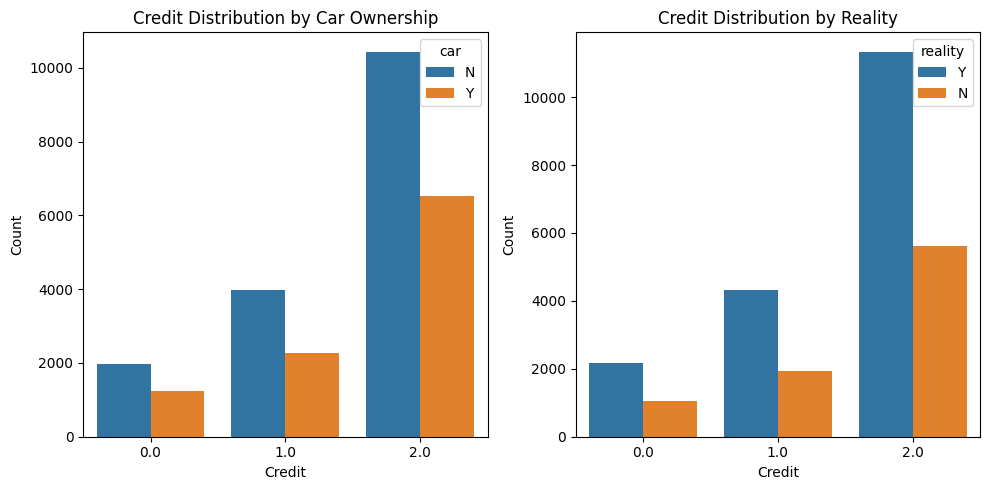

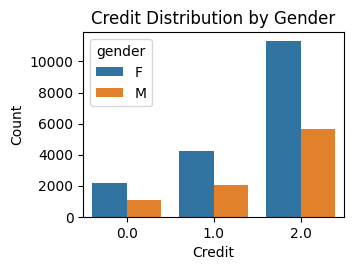

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 차량 소유 여부에 따른 credit 분포 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='credit', hue='car', data=credit)
plt.title('Credit Distribution by Car Ownership')
plt.xlabel('Credit')
plt.ylabel('Count')

# 주택 소유 여부에 따른 credit 분포 시각화
plt.subplot(1, 2, 2)
sns.countplot(x='credit', hue='reality', data=credit)
plt.title('Credit Distribution by Reality')
plt.xlabel('Credit')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 성별에 따른 credit 분포 시각화
plt.subplot(2, 2, 1)
sns.countplot(x='credit', hue='gender', data=credit)
plt.title('Credit Distribution by Gender')
plt.xlabel('Credit')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 차를 안가지고 있는게 신용등급 좋은 사람이 많음
# 부동산을 가지고 있는게 신용등급 좋은 사람이 많음
# 여자가 신용등급이 대부분 좋음

In [ ]:
credit['credit'].value_counts()

,count
credit,
2.0,16968
1.0,6267
0.0,3222


# 2. 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC

credit['gender'] = LabelEncoder().fit_transform(credit['gender'])
credit['car'] = LabelEncoder().fit_transform(credit['car'])
credit['reality'] = LabelEncoder().fit_transform(credit['reality'])
credit['income_type'] = LabelEncoder().fit_transform(credit['income_type'])
credit['gender'] = LabelEncoder().fit_transform(credit['gender'])
credit['family_type'] = LabelEncoder().fit_transform(credit['family_type'])
credit['house_type'] = LabelEncoder().fit_transform(credit['house_type'])
credit['occyp_type'] = LabelEncoder().fit_transform(credit['occyp_type'])
credit.dropna(inplace=True)

# 피처와 타깃 변수 설정
X = credit[['gender', 'car', 'reality', 'income_total', 'income_type', 'family_type',
            'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
            'phone', 'occyp_type', 'family_size', 'begin_month']].values
y = credit.iloc[:, -1].values
y


# # 범주형 변수 인덱스 (Pclass, Sex, Embarked)
# categorical_features = [0, 1, 2,3,4,5,6,9,10,11,12]

# # SMOTE-NC 적용
# smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# # 정규화
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

array([1., 1., 2., ..., 2., 2., 2.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # 범주형 변수 인덱스 (Pclass, Sex, Embarked)
# categorical_features = [1, 2, 3,6,7,8]

# # SMOTE-NC 적용
# smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
# # 범주형과 수치형 변수를 고려하여 클래스 균형에 맞게 데이터를 upsampling 한 결과
# X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# # 정규화
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# 텐서변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: -0.0000
Epoch 2/50, Loss: -0.0000
Epoch 3/50, Loss: -0.0000
Epoch 4/50, Loss: -0.0000
Epoch 5/50, Loss: -0.0000
Epoch 6/50, Loss: -0.0000
Epoch 7/50, Loss: -0.0000
Epoch 8/50, Loss: -0.0000
Epoch 9/50, Loss: -0.0000


### 4. 깃허브 울렁증 격파하기

스토리: 누군가 나에게 분류에는 어떤 모델이 좋다고 써보라고 했다. 그 모델이 뭔진 모르겠다. 그럼에도 불구하고 갖다 써보자

### 1) TabNet 스크립트 버전

---
https://github.com/huangyz0918/tabnet

In [ ]:
!git clone https://github.com/huangyz0918/tabnet.git

Cloning into 'tabnet'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 11), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.74 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd tabnet  # 작업디렉토리를 이동

/content/tabnet


In [ ]:
!pwd #현재 작업디렉토리의 경로를 출력

/content/tabnet


In [ ]:
!pip install neptune-client==0.9.18

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for neptune-client: filename=neptune_client-0.9.18-py2.py3-none-any.whl size=420077 sha256=418bd3c89a0bf7cc952604271ff112d9acf5c9993c3b811403cf53195d8f0908
  Stored in directory: /root/.cache/pip/wheels/f2/99/34/9085934e30cec49b7cd4010aa4f550b965c57030cdc890f848
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67675 sha256=1aa19d99a54340fa1be19dcbd66b17dc18bd803f2f35329a143a03d2ec4

In [ ]:
!pip install sparsemax==0.1.9

In [ ]:
!python main.py

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 1, Total train loss: 0.9434, Validation criterion loss: 0.6848, Validation accuracy: 0.5654
Predictive - Epoch: 2, Step: 2, Total train loss: 0.6192, Validation criterion loss: 0.5076, Validation accuracy: 0.7815
Predictive - Epoch: 3, Step: 3, Total train loss: 0.4955, Validation criterion loss: 0.429, Validation accuracy: 0.7908
Predictive - Epoch: 4, Step: 4, Total train loss: 0.4031, Validation criterion loss: 0.3772, Validation accuracy: 0.8169
Predictive - Epoch: 5, Step: 5, Total train loss: 0.3399, Validation criterion loss: 0.2905, Validation accuracy: 0.8723
Predictive - Epoch: 6, Step: 6, Total train loss: 0.282, Validation criterion loss: 0.2421, Validation accuracy: 0.8992
Predictive - Epoch: 7, Step: 7, Total train loss: 0.2368, Validation criterion loss: 0.2043

In [ ]:
!git clone https://github.com/huangyz0918/tabnet

Cloning into 'tabnet'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 11), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.74 MiB | 5.33 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd tabnet

/content/tabnet


In [ ]:
!cp -r /content/wine.csv /content/tabnet/data

In [ ]:
!pip install neptune-client==0.9.18

In [ ]:
!pip install sparsemax

In [ ]:
!python main.py  #메인에 train valid 싹다 있음. #main.py 로거 싹다 삭제

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 82, Total train loss: 0.2245, Validation criterion loss: 0.2147, Validation accuracy: 0.9108
Predictive - Epoch: 2, Step: 164, Total train loss: 0.162, Validation criterion loss: 0.2831, Validation accuracy: 0.9292
Predictive - Epoch: 3, Step: 246, Total train loss: 0.1112, Validation criterion loss: 0.2265, Validation accuracy: 0.9262
Predictive - Epoch: 4, Step: 328, Total train loss: 0.0949, Validation criterion loss: 0.2372, Validation accuracy: 0.8992
Predictive - Epoch: 5, Step: 410, Total train loss: 0.1109, Validation criterion loss: 0.328, Validation accuracy: 0.8838
Predictive - Epoch: 6, Step: 492, Total train loss: 0.1038, Validation criterion loss: 0.2709, Validation accuracy: 0.8962
Predictive - Epoch: 7, Step: 574, Total train loss: 0.1011, Validation criterion

In [ ]:
%cd ..

### 2) TabNet 울렁증 버전

---
https://github.com/dreamquark-ai/tabnet


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 632.7 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv('wine.csv')

# 특성과 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# TabNetClassifier 초기화 및 학습
clf = TabNetClassifier()

# GPU 모드일때
#import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#clf = TabNetClassifier(device_name=device.type)  # GPU 사용 설정

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# 예측
preds = clf.predict(X_valid)

# 성능 평가
accuracy = accuracy_score(y_valid, preds)
print(f'Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.31352 | val_0_auc: 0.94458 |  0:00:01s
epoch 1  | loss: 0.10203 | val_0_auc: 0.99114 |  0:00:01s
epoch 2  | loss: 0.08551 | val_0_auc: 0.99484 |  0:00:02s
epoch 3  | loss: 0.05907 | val_0_auc: 0.99412 |  0:00:03s
epoch 4  | loss: 0.05207 | val_0_auc: 0.99656 |  0:00:04s
epoch 5  | loss: 0.05124 | val_0_auc: 0.99835 |  0:00:05s
epoch 6  | loss: 0.0477  | val_0_auc: 0.99935 |  0:00:06s
epoch 7  | loss: 0.04294 | val_0_auc: 0.99938 |  0:00:06s
epoch 8  | loss: 0.03777 | val_0_auc: 0.99966 |  0:00:07s
epoch 9  | loss: 0.03198 | val_0_auc: 0.9995  |  0:00:08s
epoch 10 | loss: 0.02692 | val_0_auc: 0.99944 |  0:00:09s
epoch 11 | loss: 0.01987 | val_0_auc: 0.99919 |  0:00:10s
epoch 12 | loss: 0.02677 | val_0_auc: 0.99908 |  0:00:10s
epoch 13 | loss: 0.02331 | val_0_auc: 0.99847 |  0:00:12s
epoch 14 | loss: 0.02111 | val_0_auc: 0.99874 |  0:00:13s
epoch 15 | loss: 0.02229 | val_0_auc: 0.9972  |  0:00:14s
epoch 16 | loss: 0.02312 | val_0_auc: 0.99699 |  0:00:14s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9938


### 3) TabTransformer 오피셜이 공개되지 않은 버전

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
!pip install tab-transformer-pytorch

In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 독립 변수와 종속 변수 분리
X = df.drop('class', axis=1).values  # class 열 제외한 나머지 열 사용
y = df['class'].values  # 0 또는 1로 레이블링된 와인 품질

# 데이터셋 분리 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=[],
    num_continuous=X_train_tensor.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
                            # 범주형 변수와 수치형변수 입력을 따로 줘야함 이 모델은
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_train_tensor)  # 범주형 변수가 없으므로 비어있는 텐서를 줘야함.
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0 :
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_test_tensor)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.7227
Epoch 10/50, Loss: 0.6908
Epoch 15/50, Loss: 0.6619
Epoch 20/50, Loss: 0.6333
Epoch 25/50, Loss: 0.6018
Epoch 30/50, Loss: 0.5647
Epoch 35/50, Loss: 0.5207
Epoch 40/50, Loss: 0.4710
Epoch 45/50, Loss: 0.4176
Epoch 50/50, Loss: 0.3623
Valid Accuracy: 0.9738


### 3) TabTransformer 오피셜이 공개되지 않은 버전 - 타이타닉

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')

# 필요한 열 선택 및 전처리
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 범주형 변수 인코딩
label_encoders = {}
for col in ['Pclass', 'Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Survived', axis=1).values  # 'Survived' 열 제외한 나머지 열 사용
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 연속형 변수만 정규화 적용
scaler = StandardScaler()
X_train[:, [2, 3]] = scaler.fit_transform(X_train[:, [2, 3]])  # 연속형 변수 (Age, Fare)만 정규화
X_test[:, [2, 3]] = scaler.transform(X_test[:, [2, 3]])

X_train_categ = torch.tensor(X_train[:, [0, 1, 4]], dtype=torch.int64)  # 범주형 변수 (Pclass, Sex, Embarked)
X_train_cont = torch.tensor(X_train[:, [2, 3]], dtype=torch.float32)  # 연속형 변수 (Age, Fare)
X_test_categ = torch.tensor(X_test[:, [0, 1, 4]], dtype=torch.int64)
X_test_cont = torch.tensor(X_test[:, [2, 3]], dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=(3, 2, 3),  # Pclass, Sex, Embarked의 고유 값 개수
    num_continuous=X_train_cont.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(X_train_categ, X_train_cont)  # 범주형 및 연속형 변수 모두 전달
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test_categ, X_test_cont)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.4601
Epoch 10/50, Loss: 0.4423
Epoch 15/50, Loss: 0.4370
Epoch 20/50, Loss: 0.4333
Epoch 25/50, Loss: 0.4311
Epoch 30/50, Loss: 0.4291
Epoch 35/50, Loss: 0.4299
Epoch 40/50, Loss: 0.4284
Epoch 45/50, Loss: 0.4265
Epoch 50/50, Loss: 0.4268
Valid Accuracy: 0.7762


# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기


In [109]:
import pandas as pd

Loan = pd.read_csv('Loan Status Prediction.csv').iloc[:,1:]

Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [110]:
Loan.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Loan_ID: 대출 식별자 (각 대출의 고유한 ID)

Gender: 대출 신청자의 성별 (남성/여성)

Married: 결혼 여부 (결혼/미혼)

Dependents: 부양가족 수 (대출 신청자에게
부양해야 할 가족 수)

Education: 교육 수준 (졸업/비졸업)

Self_Employed: 자영업 여부 (자영업자/비자영업자)

ApplicantIncome: 대출 신청자의 소득

CoapplicantIncome: 공동 신청자의 소득 (대출에 공동 신청자가 있을 경우)

LoanAmount: 대출 금액 (대출 신청한 금액)

Loan_Amount_Term: 대출 기간 (월 단위로 나타낸 대출 상환 기간)

Credit_History: 신용 기록 (1이면 좋은 신용 기록, 0이면 나쁜 신용 기록)

Property_Area: 자산 지역 (도시, 준도시, 시골)

Loan_Status: 대출 승인 여부 (승인/미승인)

# 결측치 처리
1. 결혼 여부의 결측치는 미혼으로 대체
대출 신청자의 부양가족 수는 0으로 대체

2. 자영업자/비자영업자는 대체하기 애매 결측치 행 삭제

3. 대출 기간도 애매 결측치 행 삭제
대츨 금액 행도 삭제
신용 기록도 결측치 행 삭제

In [111]:
Loan['Married'].fillna('No', inplace=True)
Loan['Dependents'].fillna(0, inplace=True)

In [112]:
Loan.dropna(subset=['Self_Employed', 'Loan_Amount_Term', 'LoanAmount', 'Credit_History'], inplace=True)

In [113]:
Loan.isnull().sum()

,0
Gender,12
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# 1. EDA

대출 승인 여부는

대출 신청자의 소득(ApplicantIncome)

대출 금액(LoanAmount)

대출 기간(Loan_Amount_Term)

신용 기록(Credit_History)

자산 지역이 가장 영향이 많을 것 같다

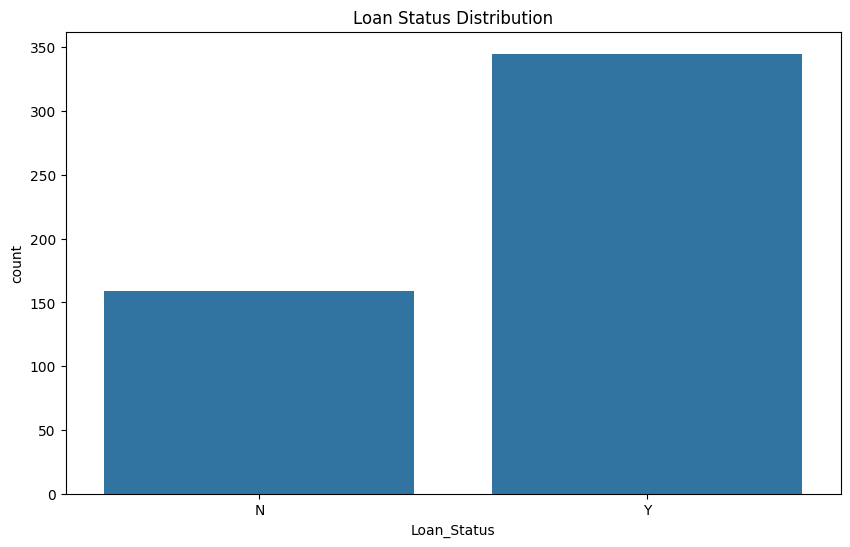

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=Loan, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

In [115]:
Loan['Loan_Status'].value_counts()

,count
Loan_Status,
Y,345
N,159


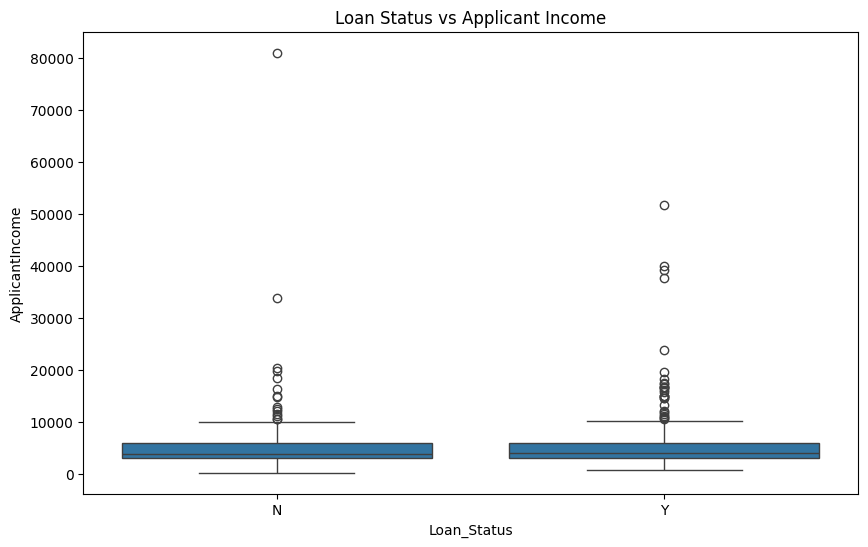

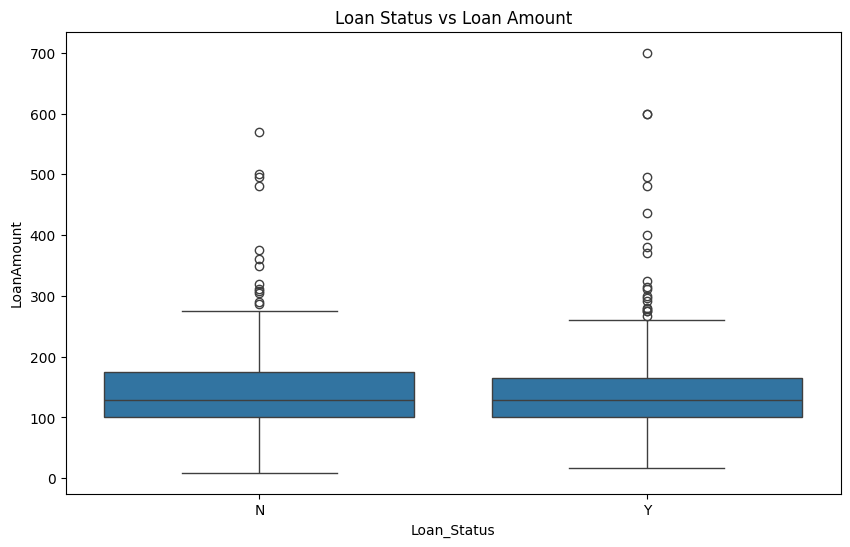

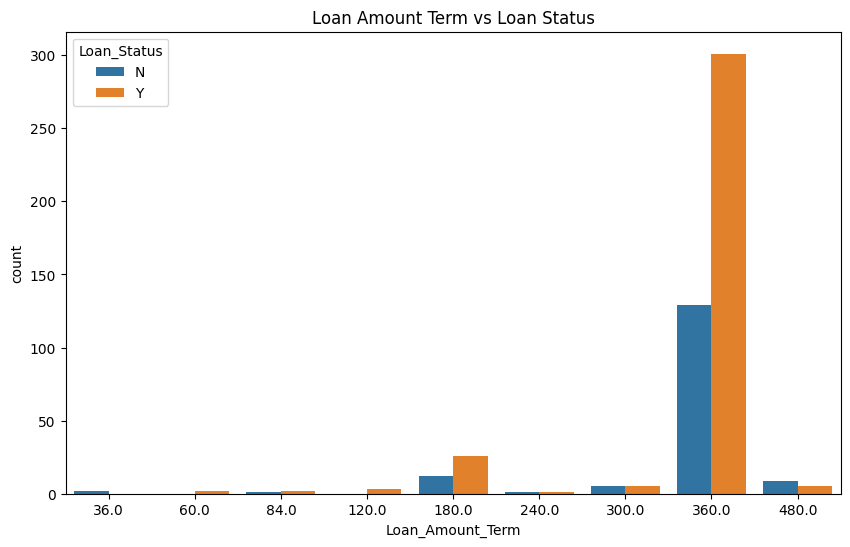

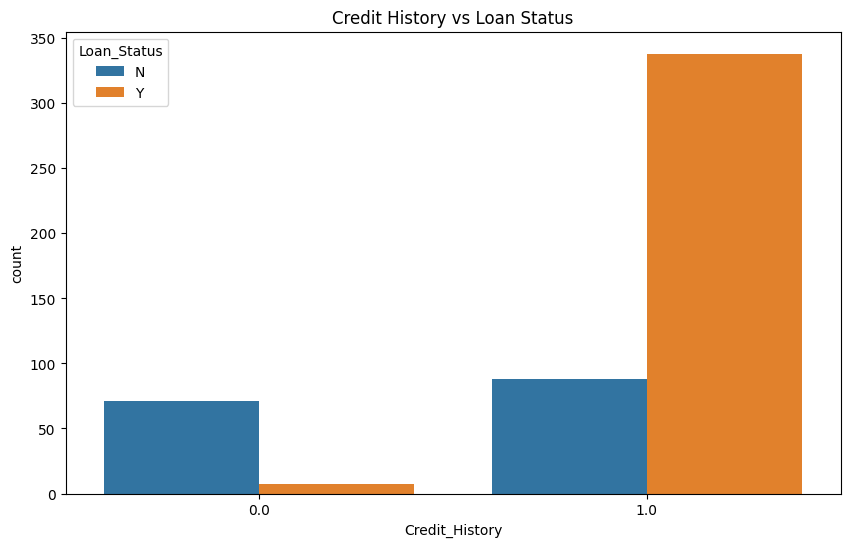

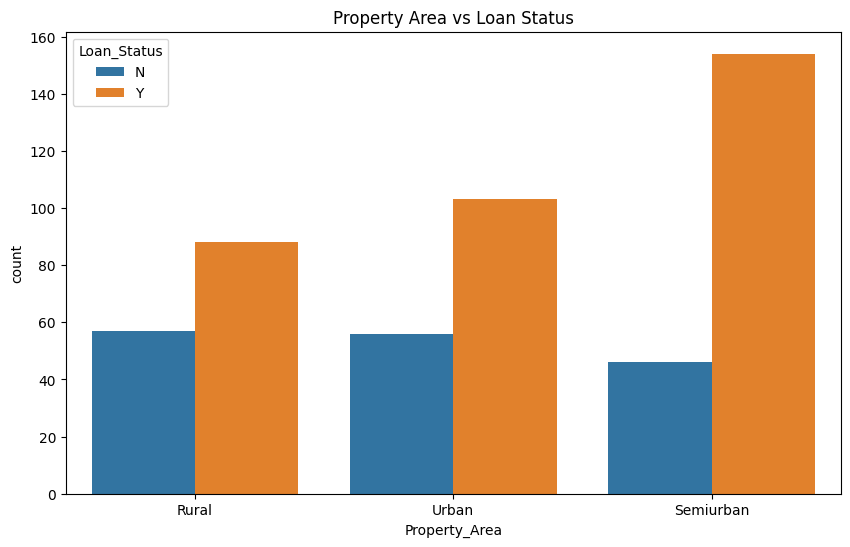

In [116]:
# 대출 승인 여부와 ApplicantIncome (소득)간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=Loan)
plt.title('Loan Status vs Applicant Income')
plt.show()

# 대출 승인 여부와 LoanAmount(대출 금액) 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=Loan)
plt.title('Loan Status vs Loan Amount')
plt.show()

# 대출 승인 여부와 Loan_Amount_Term(대출 기간) 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=Loan)
plt.title('Loan Amount Term vs Loan Status')
plt.show()

# 대출 승인 여부와 Credit_History(신용 기록) 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=Loan)
plt.title('Credit History vs Loan Status')
plt.show()

# 대출 승인 여부와 Property_Area(자산 지역) 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=Loan)
plt.title('Property Area vs Loan Status')
plt.show()

# 2. 모델링

Y가 이진분류이다.

X는 다 중요해보이니 일단 다 feature로 사용하겠다.

인코딩 해야할 컬럼들
Gender , Married , Education , Self_Employed,Property_Area

Y도 인코딩해야하나?

In [119]:
from sklearn.preprocessing import LabelEncoder

# 'Dependents' 열을 모두 문자열로 변환
Loan['Dependents'] = Loan['Dependents'].astype(str) # int와 str 섞여있어서 object로 강제 변환

cate_columns = Loan.select_dtypes(include=['object']).columns
print(cate_columns[:-1]) # 정답 제외

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [120]:
result = []
for col in list(cate_columns[:-1]):
    #print(col)
    result.append(list(Loan.columns).index(col))
result

[0, 1, 2, 3, 4, 10]

In [121]:

# cate_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
label_encoder = LabelEncoder()
for col in cate_columns:
    Loan[col] = label_encoder.fit_transform(Loan[col])

In [142]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(Loan.iloc[:,:-1],Loan.iloc[:,-1],test_size=0.2,shuffle=True, stratify=Loan['Loan_Status'] ,random_state=42)

In [158]:
import torch
import pandas as pd
from sklearn.preprocessing import RobustScaler

# 데이터프레임 또는 넘파이 배열로 가정
if isinstance(X_train, torch.Tensor):
    X_train_np = X_train.numpy()
else:
    X_train_np = X_train

if isinstance(X_test, torch.Tensor):
    X_test_np = X_test.numpy()
else:
    X_test_np = X_test

# 데이터 정규화
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_valid_scaled = scaler.transform(X_test_np)

# 넘파이 배열을 텐서로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid_scaled, dtype=torch.float32)

# y_train과 y_test가 텐서인 경우
if isinstance(y_train, torch.Tensor):
    y_train_tensor = y_train
else:
    y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)

if isinstance(y_test, torch.Tensor):
    y_valid_tensor = y_test
else:
    y_valid_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

# 출력 확인 (옵션)
print(X_train_tensor.shape, X_valid_tensor.shape, y_train_tensor.shape, y_valid_tensor.shape)


torch.Size([403, 11]) torch.Size([101, 11]) torch.Size([101]) torch.Size([101])


In [159]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             504 non-null    int64  
 1   Married            504 non-null    int64  
 2   Dependents         504 non-null    int64  
 3   Education          504 non-null    int64  
 4   Self_Employed      504 non-null    int64  
 5   ApplicantIncome    504 non-null    int64  
 6   CoapplicantIncome  504 non-null    float64
 7   LoanAmount         504 non-null    float64
 8   Loan_Amount_Term   504 non-null    float64
 9   Credit_History     504 non-null    float64
 10  Property_Area      504 non-null    int64  
 11  Loan_Status        504 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.2 KB


In [160]:
Loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [161]:
import torch
import torch.nn as nn
import torch.optim as optim  # torch.optim 모듈 임포트
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTENC  # SMOTENC 임포트


# 범주형 변수 인덱스
categorical_features = [0, 1, 2, 3, 4, 10]


# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

In [162]:
X_train.shape

torch.Size([403, 11])

In [163]:
y_train.shape

torch.Size([101])

In [164]:

# 범주형과 수치형 변수를 고려하여 클래스 균형에 맞게 데이터를 upsampling 한 결과
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)


In [179]:
import torch
import pandas as pd
from sklearn.preprocessing import RobustScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(Loan.iloc[:,:-1], Loan.iloc[:,-1], test_size=0.2, random_state=42)

# 데이터 정규화
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_test)

# 넘파이 배열을 텐서로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid_scaled, dtype=torch.float32)

# y_train과 y_test가 pandas 시리즈인 경우
if isinstance(y_train, pd.Series):
    y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)
else:
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

if isinstance(y_test, pd.Series):
    y_valid_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)
else:
    y_valid_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 텐서 크기 확인
print(f'X_train_tensor shape: {X_train_tensor.shape}')
print(f'y_train_tensor shape: {y_train_tensor.shape}')
print(f'X_valid_tensor shape: {X_valid_tensor.shape}')
print(f'y_valid_tensor shape: {y_valid_tensor.shape}')

# 데이터셋과 데이터로더 준비
assert X_train_tensor.shape[0] == y_train_tensor.shape[0], "X_train and y_train size mismatch"
assert X_valid_tensor.shape[0] == y_valid_tensor.shape[0], "X_valid and y_valid size mismatch"

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train_tensor.shape[1]
model = DNN(input_dim)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


X_train_tensor shape: torch.Size([403, 11])
y_train_tensor shape: torch.Size([403, 1])
X_valid_tensor shape: torch.Size([101, 11])
y_valid_tensor shape: torch.Size([101, 1])
Epoch 1/10, Loss: 0.6723
Epoch 2/10, Loss: 0.6796
Epoch 3/10, Loss: 0.6565
Epoch 4/10, Loss: 0.6495
Epoch 5/10, Loss: 0.6394
Epoch 6/10, Loss: 0.6674
Epoch 7/10, Loss: 0.6301
Epoch 8/10, Loss: 0.5492
Epoch 9/10, Loss: 0.5915
Epoch 10/10, Loss: 0.6764
Accuracy: 0.7129
F1 Score: 0.8263
Confusion Matrix:
[[ 3 28]
 [ 1 69]]
Precision: 0.7113
Recall: 0.9857


배치노말,드롭아웃 안쓴 상태

쓰니깐 오히려 내려감

###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.